<>:30: SyntaxWarning: invalid escape sequence '\P'
<>:30: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Haani\AppData\Local\Temp\ipykernel_6708\481032019.py:30: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_excel("D:\PE3\portal-questions\Day1\ML470_S1_HR_Data_Practice.xlsx")


GaussianNB()

[1 0 1 ... 0 0 0]

ROC-AUC Score: 0.8174430545133711


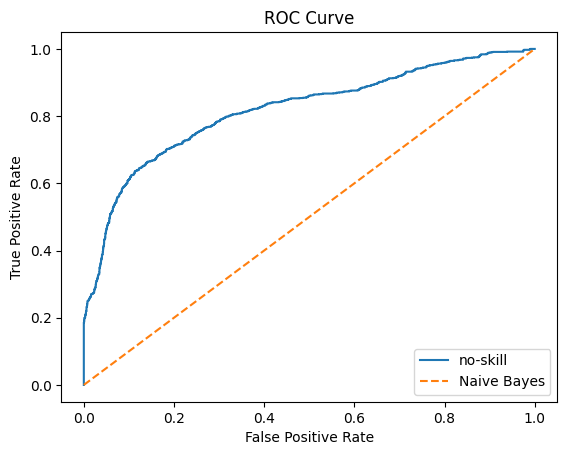

In [3]:
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc

# ---------- AUC-ROC FUNCTION ----------
def auc_roc(classifier, X_test, y_test):
    y_prob = classifier.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    print(f"ROC-AUC Score: {roc_auc}")

    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(["no-skill","Naive Bayes"],loc="lower right")
    plt.show()


# ---------- MAIN PROGRAM ----------

# Read Excel file
df = pd.read_excel("D:\PE3\portal-questions\Day1\ML470_S1_HR_Data_Practice.xlsx")

# Encode categorical variables
dept_dummies = pd.get_dummies(df['Department'], prefix='Department')
salary_dummies = pd.get_dummies(df['salary'], prefix='salary')

df = pd.concat([df, dept_dummies, salary_dummies], axis=1)

# Drop original categorical columns
df.drop(['Department', 'salary'], axis=1, inplace=True)

# Separate features and target
X = df.drop('left', axis=1)
y = df['left']

# Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3
)

# Train Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Print trained model
print(model)
print()

# Predict on test data
predictions = model.predict(X_test)
print(predictions)
print()

# ROC-AUC evaluation
auc_roc(model, X_test, y_test)
